## Background & Context
Sabi operates in the B2B commerce space, connecting buyers and sellers without controlling inventory, pricing, or external factors like macroeconomic trends. Instead, Sabi focuses on areas it can influence: matching buyers and sellers, improving product visibility, facilitating transactions, and delivering data-driven insights to drive engagement and activation.

The challenge is ensuring efficient product movement while meeting demand through the right sellers and buyers. This requires balancing demand forecasting, product prioritization, buyer behavior analysis, and seller performance evaluation.

### Key Objectives

- Demand Forecasting: Predict future demand using historical trends, seasonal patterns, and other factors.
- Product Prioritization: Identify high-potential products based on profitability, growth, and business alignment.
- Optimizing Matching: Use data-driven algorithms to improve connections between products, sellers, and buyers.
- Leveraging Control Points: Focus on areas where Sabi has influence—visibility, transactions, and actionable insights.

### Plan of Action

- Build predictive models (e.g., Random Forest, XGBoost) to forecast demand and capture seasonality.
- Develop frameworks to prioritize products based on key metrics like NMV, growth, and buyer trends.
- Analyze seller and buyer behaviors to refine engagement strategies and optimize matches.

### Expected Outcomes
This project aims to create a scalable system that:

- Improves forecasts to guide better matching decisions.
- Identifies key products to drive growth and meet buyer needs.
- Boosts visibility, engagement, and trade efficiency.
- Enhances metrics like NMV, buyer retention, and seller success rates, solidifying Sabi’s value in the marketplace.

### Feature Descriptions
1. Month & Year: The specific time period (month and year) associated with the data.
2. Products: The specific items or goods being analyzed or sold.
3. Product_Selling_Price: The price at which the product is sold to buyers.
4. NMV (Net Merchandise Value): The total value of fulfilled orders, excluding discounts and returns.
5. Average Fulfilled Value: The average monetary value of successfully fulfilled orders.
6. Number of Fulfilled Orders: The count of orders that have been successfully completed and delivered.
7. Volume (NMV): The quantity of products associated with the NMV.
8. Active Buyers (NMV): The number of buyers contributing to the NMV within the given period.
9. Number of Weeks Purchased (NMV): The number of weeks in which the product was purchased during the analysis period.
10. TotalWeeks: The total number of weeks in the analysis period, providing context for purchase frequency.
11. Product Consistency Ratio: The ratio indicating how consistently a product is purchased over time.
12. NMV Share (%): The percentage contribution of a product or category to the total NMV.
13. Avg_NMV_per_Day: The average NMV generated per day.
14. Avg_NMV_per_Week: The average NMV generated per week.
15. Volume-to-NMV Ratio: The ratio of product volume to the NMV, indicating value per unit sold.
16. Volume-NMV Ratio Category: A classification based on the Volume-to-NMV Ratio to group similar products.
17. NMV Growth Rate (%): The percentage change in NMV compared to a prior period.
18. Active Buyers (NMV) Growth Rate (%): The growth rate of buyers contributing to NMV over time.
19. Volume Growth Rate (%): The percentage change in product volume sold over time.
20. Demand Variability: A measure of fluctuations in product demand over time.
21. Seasonal Index: A factor that captures seasonality in product demand patterns.
22. Seasonal Index Category: A classification of products based on their seasonal demand patterns.
23. Qty_Sold_per_Week: The average quantity of the product sold weekly.
24. Price Sensitivity: A measure of how changes in price affect product demand.
25. Price Sensitivity Category: A classification of products based on their price sensitivity.
26. Lag1_Volume: The volume of products sold in the previous month or period.
27. Lag2_Volume: The volume of products sold two months or periods prior.
28. Lag3_Volume: The volume of products sold three months or periods prior.
29. Lag4_Volume: The volume of products sold four months or periods prior.
30. Lag5_Volume: The volume of products sold five months or periods prior.
31. Lag6_Volume: The volume of products sold six months or periods prior.

##### Replacing missing values in the NMV Growth Rate (%), Active Buyers (NMV) Growth Rate (%), and Volume Growth Rate (%) columns with NaN to properly handle periods with unavailable data for growth rate calculations.

# Model Building Approach Documentation

## Overview

This document outlines the approach used for building a machine learning model for demand forecasting, focusing on the preprocessing, feature engineering, model training, and evaluation steps. The approach follows a structured flow to handle data preprocessing, feature extraction, model selection, training, and evaluation using advanced techniques such as stacking models and recursive feature elimination (RFE).

## 1. Data Preprocessing

### 1.1 Handling Missing Values
Missing values in the dataset were handled by:
- Replacing specific columns (`NMV_Growth_Rate_(%)`, `Active_Buyers_(NMV)_Growth_Rate_(%)`, `Volume_Growth_Rate_(%)`, etc.) with numeric values, coercing errors to `NaN`.
- Filling missing values in `#_of_Weeks_Purchased_(NMV)` and `Product_Consistency_Ratio` with their respective column means.

### 1.2 Feature Engineering
New features were created to enhance the model's ability to predict demand:
- **Price-to-Volume Ratio**: Created by dividing `Product_Selling_Price` by `Volume_(NMV)`.
- **Fulfillment Efficiency**: Created by dividing `#_of_Fulfilled_Orders` by `TotalWeeks`.
- **Revenue per Buyer**: Created by dividing `NMV` by `Active_Buyers_(NMV)`.

### 1.3 Date and Time Processing
- The `Month & Year` column was converted to a datetime object, and a new column `Year-Month` was created for easier comparison and filtering.

### 1.4 Data Splitting
- The dataset was split into training and test sets based on the most recent month (`Year-Month`).
- The test set was filtered to include only data from the most recent month, while the training set included data from earlier months.

## 2. Categorical Data Encoding

### 2.1 One-Hot Encoding for Date
- One-hot encoding was applied to the `Month & Year` column to transform it into multiple binary columns representing each month.

### 2.2 Target Encoding for Products
- Target encoding was applied to the `Products` column to represent each product by its average `Volume_(NMV)` value, allowing the model to capture product-level trends.

### 2.3 One-Hot Encoding for Other Categorical Variables
- One-hot encoding was also applied to other categorical features such as `Volume_to_NMV_Ratio_Category`, `Seasonal_Index_Category`, and `Price_Sensitivity_Category`.

## 3. Feature Scaling
- Numerical features were scaled using `StandardScaler` to ensure that all features have the same scale, improving model performance.

## 4. Feature Selection

### 4.1 Recursive Feature Elimination (RFE)
- RFE was used with XGBoost as the estimator to select the most important features for the model. The selected features were then used to train the model.

### 4.2 Manually Including Lag Features
- Certain lag features (`Lag1_Volume`, `Lag2_Volume`, etc.) were manually included in the selected feature set to ensure that temporal patterns were captured.

## 5. Model Training

### 5.1 Splitting the Data
- The data was split into training (80%) and validation (20%) sets using `train_test_split`.
- An unseen test set was also prepared for final model evaluation.

### 5.2 Model Selection
- A stacking model was chosen, combining multiple regressors (Decision Tree, Random Forest, XGBoost, and CatBoost) to improve predictive performance. XGBoost was used as the final estimator in the stacking model.

### 5.3 Cross-Validation
- Cross-validation with 5 splits was used to evaluate the stacking model's performance using R² as the metric.

## 6. Model Evaluation

### 6.1 Metrics Used
The following metrics were used to evaluate the model's performance:
- **R²**: To assess the model's ability to explain the variance in the target variable.
- **MAE**: Mean Absolute Error, indicating the average magnitude of error.
- **MSE**: Mean Squared Error, penalizing larger errors.
- **RMSE**: Root Mean Squared Error, providing an interpretable measure of model performance.
- **Explained Variance Score**: To measure the proportion of variance explained by the model.

### 6.2 Visualization
- A scatter plot was created to visualize the relationship between actual and predicted values for the validation set.

## 7. Final Model Predictions
- The stacking model was trained on the entire training set and then used to make predictions on the validation set.
- R² was calculated for the validation set, and a plot of predicted vs actual values was created to visualize the model's performance.

## 8. Conclusion

The overall approach leverages a series of preprocessing, feature engineering, model selection, and evaluation steps to ensure robust performance. The use of stacking models helps improve accuracy, while RFE ensures that only the most important features are used in the final model. This process is suitable for forecasting demand in a way that adapts to product-level and temporal variations.


| **Metric**                               | **Score**  | **Explanation**                                                                                                                                                               |
|------------------------------------------|------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **R² (Coefficient of Determination)**    | 0.996760   | This indicates that approximately 99.68% of the variance in the target variable is explained by the model, suggesting an excellent fit. A value closer to 1 indicates better performance. |
| **Adjusted R²**                          | 0.996265   | This adjusts R² for the number of predictors in the model, ensuring that the score isn't inflated by the number of variables. It’s very close to 1, indicating a solid model fit. |
| **MAE (Mean Absolute Error)**            | 0.003595   | This represents the average absolute error between predicted and actual values. A smaller value is better. The model’s average error is extremely small, showing high accuracy. |
| **MSE (Mean Squared Error)**             | 0.000168   | This is the average of the squared differences between predicted and actual values. A lower MSE is better. It indicates that the model's predictions are very close to the actual values. |
| **RMSE (Root Mean Squared Error)**       | 0.012980   | This is the square root of MSE and gives an error value in the same units as the target variable. A smaller RMSE suggests better predictive accuracy. This value shows minimal error. |
| **Explained Variance Score**             | 0.996822   | This score measures how well the model accounts for the variance in the target. A score of 0.996 means the model explains 99.68% of the variance, showing a near-perfect fit. |


Selected features using RFE (XGBoost): Index(['Product_Selling_Price', 'NMV', 'Average_Fulfilled_Value',
       '#_of_Fulfilled_Orders', 'Active_Buyers_(NMV)',
       '#_of_Weeks_Purchased_(NMV)', 'Demand_Variability', 'Seasonal_Index',
       'Qty_Sold_per_Week', 'Lag1_Volume', 'Lag2_Volume', 'Lag3_Volume',
       'Lag4_Volume', 'Lag5_Volume', 'Lag6_Volume', 'Lag2_price', 'Lag6_price',
       'Lag3_nmv', 'Lag4_nmv', 'Lag5_nmv', 'Price_to_Volume_Ratio',
       'Revenue_per_Buyer', 'Price_Sensitivity', 'Products_Label_Encoded'],
      dtype='object')
X_train: (1227, 24)
y_train: (1227,)
X_test: (137, 24)
y_test: (137,)
Stacked Model Cross-Validation R²: 0.963 (+/- 0.057)
Validation R² score: 0.991
Mean Absolute Error: 0.008
Mean Squared Error: 0.001
Root Mean Squared Error: 0.032
Explained Variance Score: 0.991


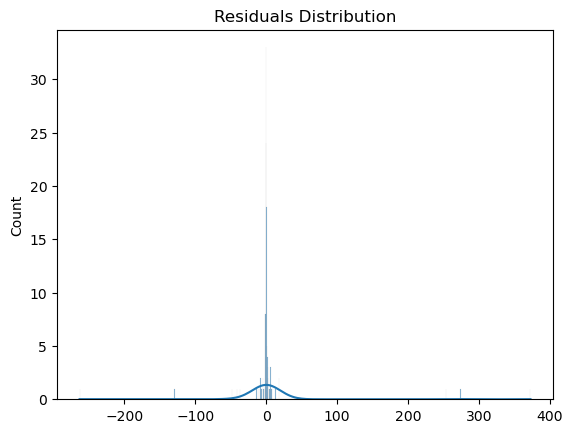

Mean Absolute Error (MAE): 12.20750067703916
Root Mean Squared Error (RMSE): 52.10769727781254
R² Score: 0.991120883341599


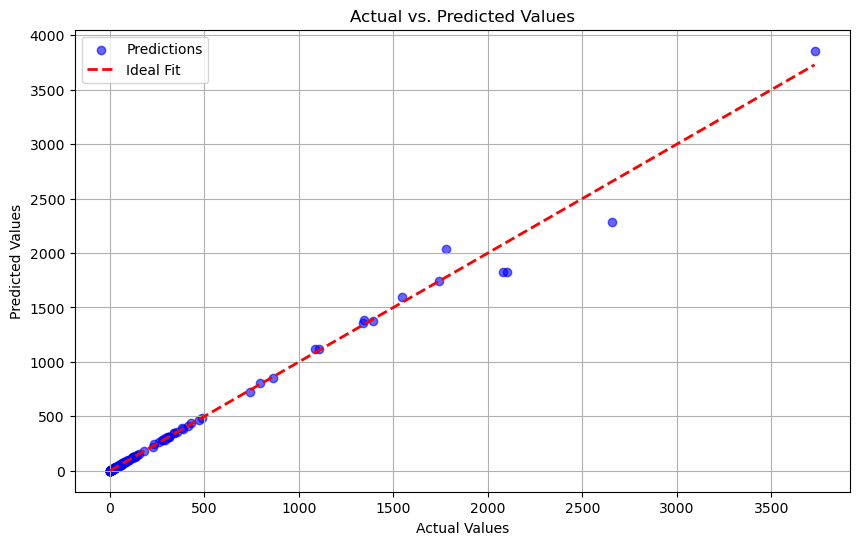

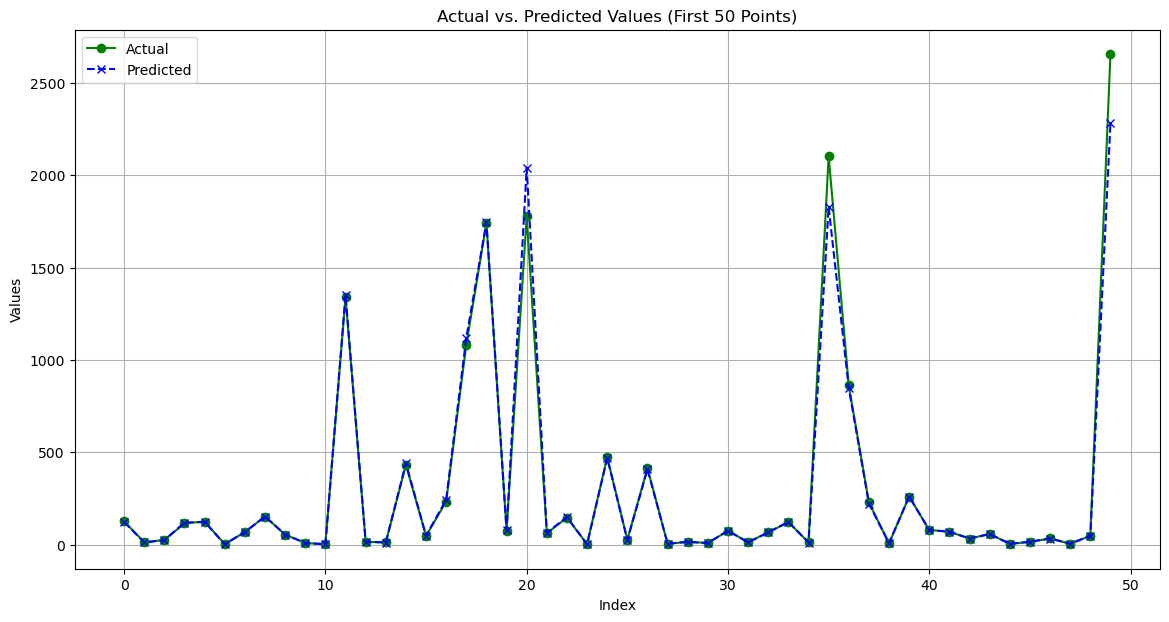

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
# Models
from sklearn.tree import DecisionTreeRegressor
import catboost as cb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import StackingRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load the dataset
file_path = 'TopProduct.xlsx'
data = pd.read_excel(file_path, sheet_name='boost')

# Preprocess missing values
columns_to_replace = ['Lag1_Volume', 'Lag2_Volume', 'Lag3_Volume', 'Lag4_Volume', 'Lag5_Volume', 'Lag6_Volume', 
                      'Lag1_price', 'Lag2_price', 'Lag3_price', 'Lag4_price', 'Lag5_price', 'Lag6_price', 'Lag1_nmv', 
                      'Lag2_nmv', 'Lag3_nmv', 'Lag4_nmv', 'Lag5_nmv', 'Lag6_nmv']
data[columns_to_replace] = data[columns_to_replace].apply(pd.to_numeric, errors='coerce')

# Feature engineering
data['Price_to_Volume_Ratio'] = data['Product_Selling_Price'] / data['Volume_(NMV)']
data['Fulfillment_Efficiency'] = data['#_of_Fulfilled_Orders'] / data['TotalWeeks']
data['Revenue_per_Buyer'] = data['NMV'] / data['Active_Buyers_(NMV)']

# List of lag columns
price_lags = [f"Lag{i}_price" for i in range(1, 7)]
volume_lags = [f"Lag{i}_Volume" for i in range(1, 7)]

# Calculate price sensitivity for each lag pair
sensitivities = []
for i in range(1, 6):  # Iterate over Lag1-Lag5
    current_price = data[f"Lag{i+1}_price"]
    previous_price = data[f"Lag{i}_price"]
    current_volume = data[f"Lag{i+1}_Volume"]
    previous_volume = data[f"Lag{i}_Volume"]

    # Calculate percentage changes (skip rows with missing data)
    price_change = (current_price - previous_price) / previous_price
    volume_change = (current_volume - previous_volume) / previous_volume
    
    # Calculate price sensitivity and handle infinity
    sensitivity = price_change / volume_change
    sensitivity = sensitivity.replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
    sensitivities.append(sensitivity)

# Combine sensitivities into a DataFrame
sensitivity_df = pd.concat(sensitivities, axis=1)
sensitivity_df.columns = [f"Sensitivity_Lag{i}" for i in range(1, 6)]

# Calculate average sensitivity for each product, ignoring NaN values
data["Price_Sensitivity"] = sensitivity_df.mean(axis=1, skipna=True)

# Function to classify Price Sensitivity Category
def price_sensitivity_category(Price_Sensitivity):
    if Price_Sensitivity < 0:
        return "Price-Driven Demand"
    elif Price_Sensitivity > 1:
        return "High Sensitivity"
    elif Price_Sensitivity > 0.5:
        return "Moderate Sensitivity"
    else:
        return "Low Sensitivity"

# Apply the function to the 'Price_Sensitivity' column and create a new 'Price Sensitivity Category' column
data['Price_Sensitivity_Category'] = data['Price_Sensitivity'].apply(price_sensitivity_category)

# List of NMV lag columns
nmv_lags = [f"Lag{i}_nmv" for i in range(1, 7)]

# Function to calculate the NMV Growth Rate (%)
def nmv_growth_rate(current, previous):
    if pd.notna(current) and pd.notna(previous):
        return ((current - previous) / previous) * 100
    else:
        return np.nan

# Calculate NMV Growth Rates for each lag
growth_rates = []
for i in range(1, 6):  # Iterate over Lag1-Lag5 to compare with Lag2-Lag6
    current_nmv = data[f"Lag{i+1}_nmv"]
    previous_nmv = data[f"Lag{i}_nmv"]
    
    growth_rate = current_nmv.combine(previous_nmv, nmv_growth_rate)
    growth_rates.append(growth_rate)

# Combine growth rates into a DataFrame
growth_rate_df = pd.concat(growth_rates, axis=1)
growth_rate_df.columns = [f"NMV_Growth_Rate_Lag{i}" for i in range(1, 6)]

# Calculate the average NMV Growth Rate for each product
data["NMV_Growth_Rate_(%)"] = growth_rate_df.mean(axis=1, skipna=True)

# Data Preprocessing
categorical_columns = ['Volume_to_NMV_Ratio_Category', 'Seasonal_Index_Category', 'Price_Sensitivity_Category']
data[categorical_columns] = data[categorical_columns].astype('category')

# Apply Label Encoding to 'Products'
def label_encode(dt, categorical_column):
    le = LabelEncoder()
    
    # Fit on training data and transform both training and test data
    dt[categorical_column + '_Label_Encoded'] = le.fit_transform(dt[categorical_column])
    return dt, le

# Apply label encoding to 'Products'
data, label_encoder = label_encode(data, 'Products')
data.drop(columns=['Products'], inplace= True)

# One-Hot Encoding for remaining categorical columns 
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_columns = encoder.fit_transform(data[categorical_columns])

# Create DataFrames from encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded columns and drop original categorical columns
data = pd.concat([data, encoded_df], axis=1).drop(columns=categorical_columns)

# Replace infinite values in the original train_data, if any, with NaN
#X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
#X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64', 'int32']).columns.tolist()

# Exclude the target variable from scaling
target_variable = 'Volume_(NMV)' 
features_to_scale = [col for col in numerical_columns if col != target_variable]

# Initialize the scaler for features
scaler = StandardScaler()

# Scale the selected numerical features
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Initialize the scaler for the target variable
target_scaler = StandardScaler()

# Scale the target variable
data[target_variable] = target_scaler.fit_transform(data[[target_variable]])


# X and y variables
X = data.drop(columns=['Volume_(NMV)'])
y = data['Volume_(NMV)']

# Feature selection using RFE with XGBoost
def feature_selection_with_rfe(X, y, n_features_to_select=None):
    """
    Perform feature selection using Recursive Feature Elimination (RFE).
    
    Parameters:
    - X: DataFrame, feature matrix for training
    - y: Series, target variable
    - n_features_to_select: int or None, number of features to select (defaults to half of features)
    
    Returns:
    - selected_columns: Index, selected feature names
    """
    
    # Define the base model as XGBoost
    base_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
    
    # Initialize RFE
    rfe = RFE(estimator=base_model, n_features_to_select=n_features_to_select)
    
    # Fit RFE on the training data
    rfe.fit(X, y)
    
    # Get selected features
    selected_columns = X.columns[rfe.support_]
    
    # Ensure that lag features are selected if they weren't selected by RFE
    lag_features = ['Lag1_Volume', 'Lag2_Volume', 'Lag3_Volume', 'Lag4_Volume', 'Lag5_Volume', 'Lag6_Volume']
    selected_columns = selected_columns.append(pd.Index([lag for lag in lag_features if lag not in selected_columns]))
    
    # Return only the selected columns, excluding the ones manually removed
    return selected_columns

# Perform RFE feature selection with XGBoost
selected_columns_rfe = feature_selection_with_rfe(X, y)

# Subset the data to only include selected features
X_selected_rfe = X[selected_columns_rfe]

# Print selected features
print(f"Selected features using RFE (XGBoost): {selected_columns_rfe}")

# Get validation set (90% for training, 10% for validation)
X_train, X_test, y_train, y_test = train_test_split(X_selected_rfe, y, test_size=0.1, random_state=42)

# Reset indices
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Print shapes of the datasets
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

# Define models for stacking
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "CatBoost": cb.CatBoostRegressor(learning_rate=0.1, iterations=1000, random_state=42, silent=True)
}

# Define stacking model
stacking_model = StackingRegressor(
    estimators=[('dt', models['Decision Tree']), 
                ('rf', models['Random Forest']),
                ('xgb', models['XGBoost']),
                ('catboost', models['CatBoost'])],
    final_estimator=xgb.XGBRegressor(random_state=42)
)

# Cross-Validation for Stacked Model
kfold = KFold(n_splits=20, shuffle=True, random_state=1)
cv_result = cross_val_score(stacking_model, X_train, y_train, scoring="r2", cv=kfold)
print(f"Stacked Model Cross-Validation R²: {cv_result.mean():.3f} (+/- {cv_result.std():.3f})")

# Fit and evaluate the model
stacking_model.fit(X_train, y_train)
y_pred_val = stacking_model.predict(X_test)

# Evaluate the results
r2_val = r2_score(y_test, y_pred_val)
print(f"Validation R² score: {r2_val:.3f}")

mae = mean_absolute_error(y_test, y_pred_val)
mse = mean_squared_error(y_test, y_pred_val)
rmse = np.sqrt(mse)
evs = explained_variance_score(y_test, y_pred_val)

print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"Explained Variance Score: {evs:.3f}")


# Inverse transform predictions and actual test targets
y_pred_original = target_scaler.inverse_transform(np.array(y_pred_val).reshape(-1, 1))
y_test_original = target_scaler.inverse_transform(np.array(y_test).reshape(-1, 1))

comparison_df = pd.DataFrame({
    "Actual": y_test_original.flatten(),
    "Predicted": y_pred_original.flatten()
})
comparison_df.head()


residuals = y_test_original.flatten() - y_pred_original.flatten()
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()



# Preparing data for visualization and evaluation
y_test_original = target_scaler.inverse_transform(np.array(y_test).reshape(-1, 1)).flatten()
y_pred_original = y_pred_original.flatten()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test_original, y_pred_original)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Visualize results with scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'r--', lw=2, label='Ideal Fit')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

# Visualize results with line plot for first 50 data points
plt.figure(figsize=(14, 7))
plt.plot(y_test_original[:50], label='Actual', marker='o', linestyle='-', color='green')
plt.plot(y_pred_original[:50], label='Predicted', marker='x', linestyle='--', color='blue')
plt.title('Actual vs. Predicted Values (First 50 Points)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

## Model Deployment

In [3]:
import pickle

# Save the model
pickle.dump(stacking_model, open('stacking_model.pkl', 'wb'))

In [4]:
pickled_model=pickle.load(open('stacking_model.pkl','rb'))

In [5]:
## Prediction
pickled_model.predict(X_test)

array([-0.14641097, -0.21470734, -0.2068975 , -0.14866611, -0.14641097,
       -0.22060297, -0.1798625 , -0.12833007, -0.18821396, -0.21675639,
       -0.22060297,  0.611228  , -0.21242858, -0.21487787,  0.04937461,
       -0.19238907, -0.07210476,  0.46814838,  0.85291016, -0.17416026,
        1.0351967 , -0.18159959, -0.1301508 , -0.22060297,  0.06688296,
       -0.20634922,  0.02927853, -0.21893357, -0.21242858, -0.21675639,
       -0.17520471, -0.21470734, -0.1809309 , -0.14641097, -0.21487787,
        0.90437365,  0.30073822, -0.0851692 , -0.21723783, -0.06148311,
       -0.17347646, -0.17864047, -0.20163795, -0.18675949, -0.21928936,
       -0.21242858, -0.20163795, -0.21893357, -0.19238907,  1.1841125 ,
        0.07890893, -0.14641097, -0.20809641, -0.0327499 , -0.20809641,
       -0.18899868, -0.2006573 , -0.14641097, -0.20357995, -0.11018296,
       -0.2211402 , -0.01042657, -0.04983192,  0.46814838, -0.2199814 ,
       -0.13929293, -0.21703114, -0.2211402 , -0.18958108, -0.22